# 4: Data pre-processing

In [25]:
# Importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading the data
df = pd.read_csv('results.txt')
df.columns = ['id', 'num', 'image', 'label', 'time']
df.drop(["num"], axis=1, inplace=True)

# Removal of outliers
print(len(df))
df.drop(df[df['time'] < 0.2].index, inplace=True)
df.drop(df[df['time'] > 3].index, inplace=True)
print(len(df))

# Normalization of reaction times for each person
df['mean'] = df.groupby('id')['time'].transform('mean')
df['min'] = df.groupby('id')['time'].transform('min')
df['max'] = df.groupby('id')['time'].transform('max')
df['normalized'] = (df['time']-df['min']) / (2*(df['max'] - df['min']))

df['SmileNorm'] = 1-df['normalized']
df['score'] = df['normalized']
df['score'][df['label'] == "Smiling"] = df['SmileNorm']

3112
3091


C:\Users\kathr\AppData\Local\Temp/ipykernel_12468/2759227173.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['score'][df['label'] == "Smiling"] = df['SmileNorm']


In [26]:
df.head()

,id,image,label,time,mean,min,max,normalized,SmileNorm,score
0,7,55_1_0_20170103183939755.jpg.chip.jpg,Smiling,0.7776,0.826893,0.4476,2.2428,0.091912,0.908088,0.908088
1,7,42_1_0_20170105173320357.jpg.chip.jpg,Smiling,0.5956,0.826893,0.4476,2.2428,0.041221,0.958779,0.958779
2,7,26_1_1_20170112205848764.jpg.chip.jpg,Smiling,0.6308,0.826893,0.4476,2.2428,0.051025,0.948975,0.948975
3,7,28_0_3_20170113153014880.jpg.chip.jpg,Not smiling,0.6131,0.826893,0.4476,2.2428,0.046095,0.953905,0.046095
4,7,50_0_0_20170113184603160.jpg.chip.jpg,Not smiling,0.7651,0.826893,0.4476,2.2428,0.088430,0.911570,0.088430


Text(0.5, 0, 'Index')

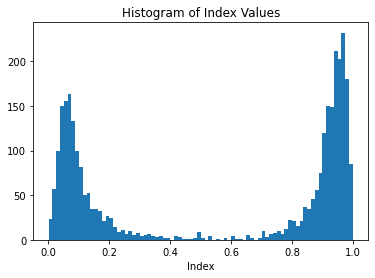

In [27]:
# Plotting histogram of index values
plt.title('Histogram of Index Values')
plt.hist(df['score'], bins = 80)
plt.xlabel('Index')

<AxesSubplot:xlabel='id', ylabel='normalized'>

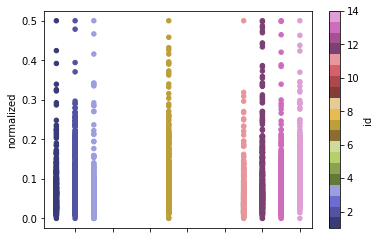

In [28]:
df.plot.scatter(x='id', y='normalized', c="id", cmap="tab20b")

In [29]:
#df.plot.scatter(x='num', y='normalized', c="id", cmap="tab20b", figsize=(15, 15))

<AxesSubplot:xlabel='label', ylabel='normalized'>

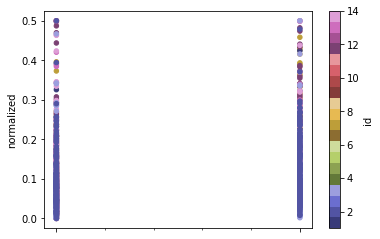

In [30]:
df.plot.scatter(x='label', y='normalized', c="id", cmap="tab20b")

<AxesSubplot:xlabel='id', ylabel='normalized'>

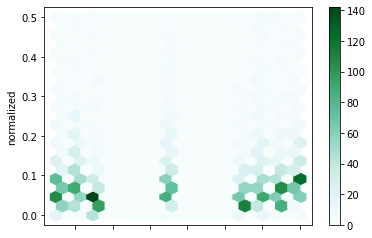

In [31]:
df.plot.hexbin(x='id', y='normalized', gridsize=20)

C:\Users\kathr\AppData\Local\Temp/ipykernel_12468/3137733631.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  series = pd.Series(index=['id','normalized'], name="series")
C:\Users\kathr\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1616: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


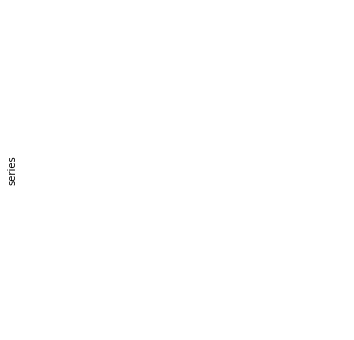

In [32]:
series = pd.Series(index=['id','normalized'], name="series")
series.plot.pie(figsize=(6, 6));

# 5: PCA and feature selection

In [33]:
# import libraries
import numpy as np
import glob
import cv2
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [34]:
# Loading the images
images = [cv2.imread(file) for file in glob.glob("SampledPhotos/*.jpg.chip.jpg")]
image_names = [str(file).split('\\')[1] for file in glob.glob("SampledPhotos/*.jpg.chip.jpg")]
im = np.array(images)

print(len(images))
print(images[0].shape)

398
(200, 200, 3)


In [35]:
# Convert images to 1D arrays, and combine all images in one 2D array
big_im = np.zeros([120000,len(images)])
for i in range(len(images)):
    big_im[:,i] = images[i].reshape(120000)

In [36]:
# Get the means of each pixel and subtract mean from every image
means = np.mean(big_im, axis=1)
print(means.shape)

subtracted_mean = (big_im.T - means).T

(120000,)


In [37]:
# run pca
pca = PCA()

S = pca.fit_transform(subtracted_mean)
print(S.shape)

A = pca.components_.T
print(A.shape)

(120000, 398)
(398, 398)


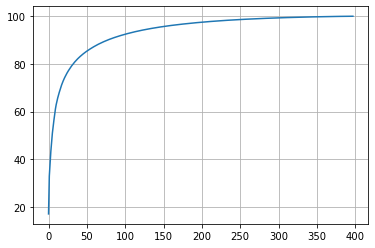

In [38]:
# plot variance of PCA components
variance = pca.explained_variance_ratio_

plt.grid()
plt.plot(np.cumsum(variance)*100)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

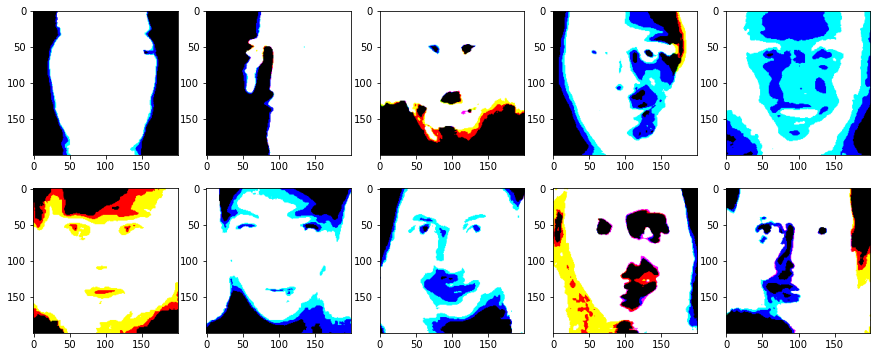

In [39]:
# Convert the components to 200x200x3 image shapes, and plot the first 10

pca_im = S[:,0].reshape([200,200,3])
pca_ims = S.reshape([200,200,3,len(images)])
pca_sub = ((means - S.T).T).reshape([200,200,3,len(images)])
    
fig = plt.figure(figsize=(15,6))
columns = 5
rows = 2
for i in range(columns*rows):
    img = pca_sub[:,:,:,i]
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img)
plt.show()

# 6: Feature Selection

In [40]:
# Calculate number of features needed to reach threshold
# Using our own forward selection method
threshold = 0.85

for i in range(len(variance)):
    
    if sum(variance[0:i+1]) >= threshold:
        num_features = i + 1
        break
print(num_features)

50


In [41]:
# Extract subset of PC's

features = S[:,0:num_features]
print(features.shape)

(120000, 50)


# 7: Linear Regression Model

In [42]:
# Create a new dataframe with all the image names
df2 = pd.DataFrame(image_names)
df2.columns = (["image"])

# Add the scores for each person to the dataframe
for i in df.groupby("id"):
    grouped_df = i[1][["image","score"]]
    df2 = pd.merge(df2, grouped_df,how="left", on=["image"])

    
# Take the average score
df2['average'] = df2.mean(numeric_only=True, axis=1)
df2.head()

C:\Users\kathr\AppData\Local\Temp/ipykernel_12468/294325442.py:8: FutureWarning: Passing 'suffixes' which cause duplicate columns {'score_x'} in the result is deprecated and will raise a MergeError in a future version.
  df2 = pd.merge(df2, grouped_df,how="left", on=["image"])


,image,score_x,score_y,score_x,score_y,score_x,score_y,score_x,score_y,average
0,20_0_0_20170104230048181.jpg.chip.jpg,0.035245,0.057297,0.078916,0.367870,0.052935,0.083465,0.035031,0.074326,0.098136
1,20_0_1_20170116010734667.jpg.chip.jpg,0.092742,0.839078,0.878550,0.111018,0.943465,NaN,0.884159,0.909813,0.665546
2,20_1_0_20170104021334149.jpg.chip.jpg,0.218306,0.035728,0.043450,0.085339,0.068924,0.082492,0.038197,0.083955,0.082049
3,20_1_0_20170113005610158.jpg.chip.jpg,0.789104,0.865095,0.953187,0.197193,0.908860,0.808310,0.927500,0.118308,0.695945
4,20_1_2_20170108224234471.jpg.chip.jpg,0.885110,0.994107,0.949461,0.919981,0.989179,0.941248,0.946870,0.939748,0.945713


In [43]:
# https://www.statology.org/principal-components-regression-in-python/

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [44]:
X = big_im.T
y = df2[['average']].to_numpy()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [45]:
#scale the training and testing data
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.transform(scale(X_test))[:,:num_features]

#train PCR model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:num_features], y_train)

#calculate RMSE
pred = regr.predict(X_reduced_test)
np.sqrt(mean_squared_error(y_test, pred))

0.2307082785351498

In [46]:
for i in range(len(pred)):
    print(f"For picture {i}: predicted {pred[i]} and real asnwer is {y_test[i]}")

For picture 0: predicted [0.54489881] and real asnwer is [0.96310588]
For picture 1: predicted [0.38980251] and real asnwer is [0.4003425]
For picture 2: predicted [0.97688625] and real asnwer is [0.92071789]
For picture 3: predicted [1.02509183] and real asnwer is [0.92613389]
For picture 4: predicted [0.908539] and real asnwer is [0.94844121]
For picture 5: predicted [0.3133724] and real asnwer is [0.50679443]
For picture 6: predicted [0.46390461] and real asnwer is [0.32652145]
For picture 7: predicted [0.80057917] and real asnwer is [0.9533617]
For picture 8: predicted [0.66639163] and real asnwer is [0.93422207]
For picture 9: predicted [0.21435201] and real asnwer is [0.47397688]
For picture 10: predicted [0.629081] and real asnwer is [0.95249781]
For picture 11: predicted [0.73392077] and real asnwer is [0.82121014]
For picture 12: predicted [0.4348154] and real asnwer is [0.81762474]
For picture 13: predicted [0.9507829] and real asnwer is [0.8334029]
For picture 14: predicted 

# 8: Generate samples

In [56]:
import numpy
A = regr.coef_
B = regr.intercept_
y = np.array([0,0.25,0.5,0.75,1])





In [50]:
regr.intercept_

array([0.55595548])

# 9

# 10